# 모델 복잡성

## KNN 예제

### 라이브러리와 데이터

In [ ]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 읽기
data = pd.read_csv('data02_iris_noisy.csv')
X = data[ ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'] ]
y = data['Species']
print( X.shape, y.shape )

FileNotFoundError: ignored

In [ ]:
# 훈련/평가 데이터의 분리
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=1)

In [ ]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

### KNN 모델 훈련

In [ ]:
# 모델 설정
from sklearn.neighbors import KNeighborsClassifier
f = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# 모델 훈련
f.fit(xtrain, ytrain)

In [ ]:
# 모델을 이용한 예측
yhat_test = f.predict(xtest)
print(yhat_test)

In [ ]:
# 모델 평가: 정확도 측정
f.score(xtest,ytest)

### 파라메터에 변화에 따른 정확도 변화

In [ ]:
# K를 1에서 50까지 변화시키면서 훈련/평가 데이터의 정확도를 측정
klist = np.arange(1,51)
train_acc = []
test_acc = []
for k in klist:
  f = KNeighborsClassifier(n_neighbors=k)
  f.fit(xtrain,ytrain)
  train_acc.append( f.score(xtrain,ytrain) )
  test_acc.append( f.score(xtest,ytest) )

In [ ]:
# 그래프로 표현
plt.plot(klist,train_acc,'b-',klist,test_acc,'r-')
plt.legend(labels=['Train','Test'])
plt.show()

## 연습문제

1. 아래의 순서에 따라 diabetes 데이터를 읽어 Y변수를 다른 변수로 예측하는 KNN 모델을 만들고, 앞선 예제를 반복하시오.<br>
(1) 데이터를 읽어 훈련/평가 데이터로 나누시오. 평가 데이터의 비율은 0.4로 하고, random_state는 1로 세팅하시오.<br>
(2) K의 값을 5로 하고, 훈련 데이터를 이용하여 모델을 훈련하시오. f.score()를 이용하여 평가 데이터에서 모델의 성능을 측정하시오. <br>
(3) K의 값을 1에서 100까지 변경하면서 훈련 데이터와 평가 데이터에서 성능을 측정하여 그래프로 나타내시오.

(1) 데이터를 읽어 훈련/평가 데이터로 나누시오. 평가 데이터의 비율은 0.4로 하고, random_state는 1로 세팅하시오.

In [ ]:
data06 = pd.read_csv('data06_diabetes.csv')

In [ ]:
data06

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220


In [ ]:
X = data06[ ['age', 'sex','bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'] ]
y = data06['Y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(265, 10) (177, 10) (265,) (177,)


(2) K의 값을 5로 하고, 훈련 데이터를 이용하여 모델을 훈련하시오. f.score()를 이용하여 평가 데이터에서 모델의 성능을 측정하시오.

In [ ]:
# 모델 설정
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# 모델 훈련
model.fit(x_train, y_train)


KNeighborsRegressor()

In [ ]:
# 모델을 이용한 예측
y_hat_test = model.predict(x_test)
print(y_hat_test)

[130.4 114.  148.   68.4 183.6 190.  239.  123.6 102.4  89.4 185.  189.4
  92.4  73.  254.  263.4 197.4  83.6 132.8 162.6 190.4  56.2 135.2  94.4
 104.4 231.2  78.4 137.4 142.4 186.6 126.  180.2 203.   92.2 122.6 163.8
 154.2 184.2 183.4 199.8  96.  187.6  99.6 100.8 100.4 216.4 117.2 150.4
 181.  175.6  52.6 128.4  92.8 123.2 212.  125.8 112.4  68.6  56.2 104.6
 101.8 222.8 166.4  74.4 249.4  75.4  72.6 190.6 174.6  79.  167.6  63.4
  80.2 184.6 200.6 111.8 111.6  76.8 233.8 166.2  86.2 118.4 107.  128.8
  88.2 159.6  83.4  86.6 201.2 118.2 162.6 153.  135.6  79.6  59.4 118.6
 109.  106.6 206.8 229.   85.8 100.2 142.8 150.4 211.4 177.2 219.  245.6
 126.4  77.8 170.4 272.4 147.4 128.2 158.2 135.6 105.   95.  205.6 175.4
  83.  277.4 198.  146.6 116.2 150.2 105.2 172.2 168.   87.8  99.2 167.8
  84.4 267.2 146.2 157.4 120.  161.6 128.   74.2 163.8  83.6 174.2 102.8
 152.  147.6  86.4 187.6 154.6 101.4 243.2 187.8 215.2 188.  109.2  96.6
 137.4 156.8  98.6  87.2  97.2  96.2 135.   72.4 24

In [ ]:
# 모델 평가: 정확도 측정
model.score(x_test,y_test)

0.31986090191985717

(3) K의 값을 1에서 100까지 변경하면서 훈련 데이터와 평가 데이터에서 성능을 측정하여 그래프로 나타내시오.

In [ ]:
# K를 1에서 100까지 변화시키면서 훈련/평가 데이터의 정확도를 측정
klist = np.arange(1,101)
train_acc = []
test_acc = []
for k in klist:
  f = KNeighborsRegressor(n_neighbors=k)
  f.fit(x_train,ytrain)
  train_acc.append( f.score(x_train,y_train) )
  test_acc.append( f.score(x_test,y_test) )

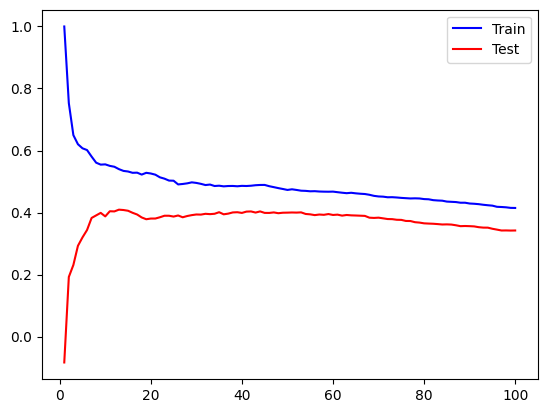

In [ ]:
# 그래프로 표현
plt.plot(klist,train_acc,'b-',klist,test_acc,'r-')
plt.legend(labels=['Train','Test'])
plt.show()